# Анализ данных e-learning платформы. Становой М.А.

### Нулевой этап. Предварительное исследование данных

In [389]:
# Импортируем необходимые библиотеки

from urllib.parse import urlencode
import requests
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [390]:
# Создадим функцию для подгрузки датасетов из Яндекс.Диска

def create_df(p_key):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=p_key))
    return pd.read_csv(requests.get(final_url).json()['href'])

In [391]:
# Импортируем датасет с информацией об оценочных работах

df_assessments = create_df('https://disk.yandex.ru/d/iSVP1sZ7AdW7TQ')

In [392]:
df_assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [393]:
# Импортируем датасет со списком предметов по семестрам

df_courses = create_df('https://disk.yandex.ru/d/jmJxR8yhwCXlaw')

In [394]:
df_courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [395]:
# Импортируем датасет с результатами тестов студентов

df_student_assessment = create_df('https://disk.yandex.ru/d/DYd4M5b_8RETsA')

In [396]:
df_student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [397]:
# Импортируем датасет с информацией о регистрации студента на прохождение курса

df_student_registration = create_df('https://disk.yandex.ru/d/lqHnH8NOZ458iw')

In [398]:
df_student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


#### Определение рамок учебного курса

Рассмотрим подробнее датасет *assessments.csv* с целью определения корректной формулировки учебного курса в рамках нашего проекта.

Для этого отберем только те записи, в которых типом тестирования является *экзамен*. Это позволит увидеть выбранные образовательной организацией контрольные срезы, определяющие конец логически завершенной единицы учебного процесса.

In [399]:
df_assessments.query('assessment_type == "Exam"').head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0


Учебным курсом в предоставленных данных является каждая уникальная комбинация значения семестра (assessments.csv, колонка code_presentation) и уникального идентификатора кода предмета (assessments.csv, колонка code_module).

#### Окончательное исследование предоставленных данных и завершение предварительного этапа

Подгрузив доступные датасеты, проверим их описательные статистики, типы данных, наличие незаполненных полей (и их соответствие описанию данных, предоставленному в исходной постановке задачи), а также необходимость в правке названия колонок для более комфортной дальнейшей работы с данными.

In [400]:
# Проверим описательные статистики датасета с информацией об оценочных работах

# Различие в значении графы count говорит об отсутствии заполненных данных в колонке date

df_assessments.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [401]:
# Проверим количество пустых полей в датасете с информацией об оценочных работах

# Подтвердили предположение об отсутствии данных в колонке date
# В описании датасета ничего не указано о возможном отсутствии данных в данной колонке, а значит стоит обратить на это
# внимание и при необходимости избавиться от этих записей при дальнейшей работе с датасетом

df_assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [402]:
# Проверим типы данных в колонках датасета с информацией об оценочных работах

df_assessments.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [403]:
# Проверим описательные статистики датасета со списком предметов по семестрам

df_courses.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [404]:
# Проверим типы данных в колонках датасета со списком предметов по семестрам

df_courses.dtypes

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

In [405]:
# Проверим количество пустых полей в датасете с информацией об оценках в тесте

df_courses.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [406]:
# Проверим описательные статистики датасета с результатами тестов студентов

# Различие в значении графы count говорит о наличии пропущенных данных в колонке score

df_student_assessment.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [407]:
# Проверим количество пустых полей в датасете с результатами тестов студентов

# Подтвердили предположение об отсутствии данных в колонке score
# В описании датасета ничего не указано о возможном отсутствии данных в данной колонке, а значит стоит обратить на это
# внимание и при необходимости избавиться от этих записей при дальнейшей работе с датасетом

df_student_assessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [408]:
# Проверим типы данных в колонках датасета с результатами тестов студентов

df_student_assessment.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

In [409]:
# Проверим описательные статистики датасета с информацией о регистрации студента на прохождение курса

df_student_registration.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [410]:
# Проверим количество пустых полей в датасете с информацией о регистрации студента на прохождение курса

# Отсутствие записей в поле date_unregistration подразумевает, что студент окончил данный курс

df_student_registration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [411]:
# Проверим типы данных в колонках датасета с информацией о регистрации студента на прохождение курса

df_student_registration.dtypes

code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

#### Выводы по предварительному анализу данных проекта

В результате предварительного анализа датасетов были выявлены записи с незаполненными данными, отсутствие которых не обосновывается в их описании датасета. Вероятно, будет необходимо убрать данные записи при работе с датасетами. В то же время, в датасете с информацией о регистрации студента на прохождение курса (studentRegistration.csv) колонка *date_unregistration* подразумевает наличие пропущенных данных, а значит, возможно, перед удалением некорректных данных понадобится заполнить данные пропуски некоторым значением (например, нулевым значением).

На этом этап предварительного анализа данных можно считать завершенным. Перейдем непосредственно к поставленным задачам.

### Задача 1. Определение количества студентов, сдавших только один курс

**Цель:** Определить сколько студентов успешно сдали только один курс. (Успешная сдача — это зачёт по курсу на экзамене)

Воспользуемся датасетами *assessments.csv* и *studentAssessment.csv*, а также предоставленной информацией о том, что условием успешной сдачи экзамена является набор 40 и более баллов).

In [412]:
# Скопируем содержимое исходного датафрейма с информацией об оценочных работах
# для того, чтобы иметь возможность всегда вернуться к исходным данным

first_task_assessments = df_assessments.copy()

# Проверим корректность копирования
first_task_assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [413]:
# Скопируем содержимое исходного датафрейма с информацией о результатах тестов студентов
# для того, чтобы иметь возможность всегда вернуться к исходным данным

first_task_stud_assessment = df_student_assessment.copy()

# Проверим корректность копирования

first_task_stud_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [414]:
# Отфильтруем записи в датасете с информацией об оценочных работах по типу проверочной работы "Exam"
# и сохраним уникальные идентификаторы экзаменов в список

exam_ids = first_task_assessments.query('assessment_type == "Exam"').id_assessment.to_list()

In [415]:
# Отфильтруем записи в датасете с информацией о результатах теста студентов по типу оценочной работы и
# кол-ву набранных баллов не менее 40

student_exams_only = first_task_stud_assessment.query('id_assessment in @exam_ids & score >= 40').reset_index(drop=True)
student_exams_only.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,24290,559706,234,0,78.0
1,24290,559770,230,0,54.0
2,24290,560114,230,0,64.0
3,24290,560311,234,0,100.0
4,24290,560494,230,0,92.0


In [416]:
# Сгруппируем ранее созданный датасет по идентификаторам студентов и подсчитаем кол-во успешно сданных ими экзаменов

successful_exam_count_per_student = student_exams_only.groupby('id_student', as_index=False) \
    .agg({'id_assessment': 'nunique'}) \
    .sort_values(by='id_assessment', ascending=False) \
    .reset_index(drop=True)

In [417]:
successful_exam_count_per_student.head()

,id_student,id_assessment
0,592093,2
1,445917,2
2,543788,2
3,582879,2
4,447644,2


In [418]:
successful_exam_count_per_student.query('id_assessment == 1').shape[0]

3802

#### Результат:

В результате анализа датасетов с информацией об оценочных работах и результатах студентов было подсчитано кол-во успешно сданных экзаменов на студента.

*Кол-во студентов, успешно окончивших только один курс равно:* **3802**

**Вывод по данному этапу:**

Небольшие значения количества студентов окончивших хотя бы один курс и максимальноого значения кол-ва успешно пройденных курсов вполне может быть оправдано форматом обучения платформы. Т.к. проектом в данном случае является e-learning платформа, то мы можем предположить о том, что она предоставляет возможность учиться только по отдельным, нужным клиенту, дисциплинам (например, курсам повышения квалификации).

### Задача 2. Выявление самого сложного и самого простого экзамена

**Цель:** Выявить самый сложный и самый простой экзамен, т.е. найти курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью.

*Под завершаемостью подразумевается отношение кол-ва успешных экзаменов к кол-ву всех попыток сдать экзамен.*

Воспользуемся датасетами *assessments.csv* и *studentAssessments.csv*.

In [419]:
# Создадим отдельный датафрейм df_assessments, чтобы не изменять исходный

df_assessments_q2 = df_assessments.copy()

In [420]:
# Создадим отдельный датафрейм df_student_assessment, чтобы не изменять исходный
# Также удалим записи с отсутствующими значениями оценки, означающие, что студент не отправил задание на оценку

print(df_student_assessment.count())
df_student_assessment_q2 = df_student_assessment.copy()
df_student_assessment_q2 = df_student_assessment_q2.dropna()
print(df_student_assessment_q2.count())

id_assessment     173912
id_student        173912
date_submitted    173912
is_banked         173912
score             173739
dtype: int64
id_assessment     173739
id_student        173739
date_submitted    173739
is_banked         173739
score             173739
dtype: int64


In [421]:
# Проверим исходное кол-во экзаменов по всем курсам

df_assessments_q2.query('assessment_type == "Exam"').reset_index(drop=True)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1757,Exam,NaN,100.0
1,AAA,2014J,1763,Exam,NaN,100.0
2,BBB,2013B,14990,Exam,NaN,100.0
3,BBB,2013J,15002,Exam,NaN,100.0
4,BBB,2014B,15014,Exam,NaN,100.0
5,BBB,2014J,15025,Exam,NaN,100.0
6,CCC,2014B,24290,Exam,NaN,100.0
7,CCC,2014B,40087,Exam,NaN,100.0
8,CCC,2014J,24299,Exam,NaN,100.0
9,CCC,2014J,40088,Exam,NaN,100.0


In [422]:
# Убедимся что каждый экзамен имеет уникальный идентификатор и наша таблица не содержит дублей

print(df_assessments_q2.query('assessment_type == "Exam"').id_assessment.count())
print(df_assessments_q2.query('assessment_type == "Exam"').id_assessment.nunique())

24
24


In [423]:
# Запишем все значения уникальных идентификаторов экзаменов в список

assessment_ids = df_assessments_q2.query('assessment_type == "Exam"').id_assessment.tolist()

In [424]:
# Отберем только те записи из дата сета с оценками студентов, в которых хранятся результаты экзаменов

df_exam_analysis = df_student_assessment_q2.query('id_assessment in @assessment_ids').reset_index(drop=True)
df_exam_analysis

,id_assessment,id_student,date_submitted,is_banked,score
0,24290,558914,230,0,32.0
1,24290,559706,234,0,78.0
2,24290,559770,230,0,54.0
3,24290,560114,230,0,64.0
4,24290,560311,234,0,100.0
...,...,...,...,...,...
4954,25368,652680,243,0,91.0
4955,25368,652732,249,0,47.0
4956,25368,652965,242,0,87.0
4957,25368,653051,242,0,27.0


In [425]:
# Подсчитаем кол-во всех попыток на каждый экзамен

df_exam_all_tries = df_exam_analysis.groupby(['id_assessment'], as_index=False) \
    .agg({'score': 'count'}) \
    .sort_values(by='score', ascending=False) \
    .reset_index(drop=True)
df_exam_all_tries

,id_assessment,score
0,24299,1168
1,25354,968
2,25368,950
3,24290,747
4,25340,602
5,25361,524


In [426]:
# Подсчитаем кол-во только успешных попыток (score которых равен или более 40)

df_exam_successful_tries = df_exam_analysis.query('score >= 40') \
    .groupby(['id_assessment'], as_index=False) \
    .agg({'score': 'count'}) \
    .sort_values(by='score', ascending=False) \
    .reset_index(drop=True)
df_exam_successful_tries

,id_assessment,score
0,24299,1019
1,25354,878
2,25368,842
3,24290,664
4,25340,504
5,25361,485


In [427]:
# Объединим полученные таблицы

df_exam_both = df_exam_all_tries.merge(df_exam_successful_tries, how='inner', on='id_assessment')
df_exam_both

,id_assessment,score_x,score_y
0,24299,1168,1019
1,25354,968,878
2,25368,950,842
3,24290,747,664
4,25340,602,504
5,25361,524,485


In [428]:
# Создадим новую колонку для хранения информации о метрике завершенности экзаменов и подсчитаем ее

df_exam_both['completeness'] = df_exam_both.score_y / df_exam_both.score_x

In [429]:
# Отсортируем получившуюся таблицу по убыванию завершенности экзамена

df_exam_both.sort_values(by='completeness', ascending=False).reset_index(drop=True)

,id_assessment,score_x,score_y,completeness
0,25361,524,485,0.925573
1,25354,968,878,0.907025
2,24290,747,664,0.888889
3,25368,950,842,0.886316
4,24299,1168,1019,0.872432
5,25340,602,504,0.837209


In [430]:
# Определим идентификаторы предмета и семестра, соответствующих самому сложному (id_assessment == 25340)
# и самому легкому экзамену (id_assessment == 25361)

df_assessments.query('id_assessment == 25361 or id_assessment == 25340')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
87,DDD,2013B,25340,Exam,240.0,100.0
101,DDD,2014B,25361,Exam,241.0,100.0


#### Ответ на вопрос:

В результате анализа датасетов был проведен подсчет кол-ва попыток для тестов с типом "Exam" и имеющих соответствие в таблице *studentAssessment.csv*. После чего отдельно было подсчитано кол-во успешных попыток сдачи экзамена (при score >= 40) и проведен расчет метрики завершенности экзамена (кол-во успешных экзаменов / кол-во всех попыток сдать экзамен).

*Наиболее сложным экзаменом (с наименьшей завершаемостью) является экзамен с идентификатором* **25340** *с идентификатором дисциплины* **DDD** *и идентификатором семестра* **2013B**

*Наиболее легким экзаменом (с наибольшей завершаемостью) является экзамен с идентификатором* **25361** *с идентификатором дисциплины* **DDD** *и идентификатором семестра* **2014B**

### Задача 3. Определение среднего срока сдачи экзаменов

**Цель:** По каждому предмету определить средний срок сдачи экзаменов (под сдачей понимается последнее успешное прохождение экзамена студентом)

Воспользуемся датасетами *assessments.csv* и *studentAssessments.csv*.

In [431]:
# Отфильтруем только те записи из датасета assessments.csv, которые относятся к типу Exam
# Объединим результирующие таблицы с данными по тестам и результатам оценочных работ студентов

df_modules_by_mean_date_submitted = df_assessments.query('assessment_type == "Exam"').merge(df_student_assessment, how='inner', on='id_assessment')
df_modules_by_mean_date_submitted

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0
1,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
2,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
3,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
4,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
...,...,...,...,...,...,...,...,...,...,...
4954,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
4955,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
4956,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0
4957,DDD,2014J,25368,Exam,NaN,100.0,653051,242,0,27.0


In [432]:
# Cгруппируем получившуюся таблицу по уникальным идентификаторм предметов
# и проведем аггрегацию данных по среднему времени сдачи экзамена

df_modules_by_mean_date_submitted.groupby(['code_module'], as_index=False) \
    .agg({'date_submitted': 'mean'})

,code_module,date_submitted
0,CCC,239.408877
1,DDD,237.901445


#### Результат:

В результате анализа датасетов был проведен подсчет кол-ва попыток для тестов с типом "Exam" и имеющих соответствие в таблице *studentAssessment.csv*. После чего отдельно было подсчитано кол-во успешных попыток сдачи экзамена (при score >= 40). Последним этапом в выполнении данного задания было определение среднего времени сдачи теста (среднее по колонке *date_submitted*).


| Идентификатор предмета | Средний срок сдачи экзамена (округленное до целых) |
| ------------- |  ------------- |
| CCC  |  240 |
| DDD  |  238 |

### Задача 4. Выявление самых популярных (ТОП-3) и самых непопулярных (ТОП-3) предметов

**Цель:** Выявить самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3)

Воспользуемся датасетом *studentRegistration.csv*.

In [433]:
# Построим таблицу, отражающую кол-во регистрационных заявок на предмет
# При этом будем учитывать даже те случаи, когда студент впоследствии отменяет свою заявку на регистрацию
# Отсортируем полученную таблицу по убыванию кол-ва заявок

df_course_popularity = df_student_registration \
    .groupby('code_module', as_index=False) \
    .agg({'id_student': 'nunique'}) \
    .sort_values('id_student', ascending=False) \
    .reset_index(drop=True)
df_course_popularity

,code_module,id_student
0,BBB,7692
1,FFF,7397
2,DDD,5848
3,CCC,4251
4,EEE,2859
5,GGG,2525
6,AAA,712


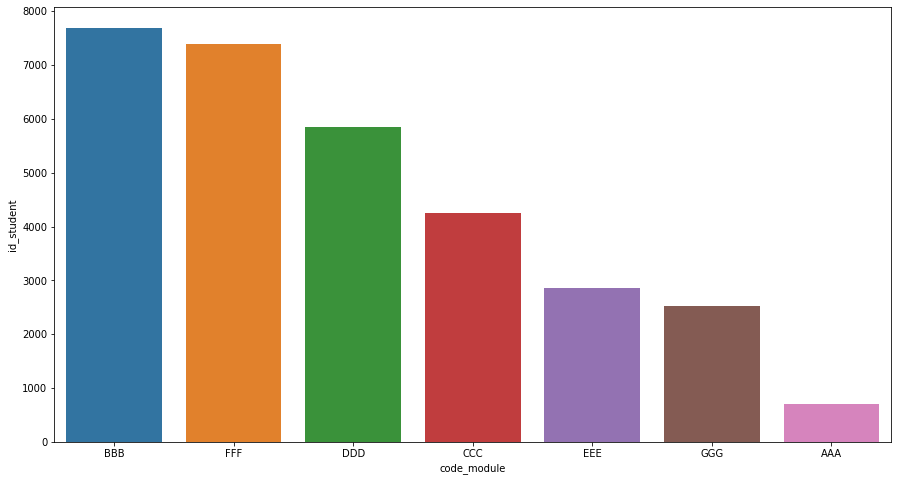

In [434]:
# Визуализируем полученные данные с помощью столбчатой диаграммы

plt.figure(figsize=(15,8))
sns.barplot(data=df_course_popularity, x='code_module', y='id_student')

In [435]:
# Для корректного подсчета оттока студентов с курса необходимо найти студентов, которые повторно записались на курс
# Для этого сгруппируем исходный датасет с данными о регистрации по курсе и идентификаторам студента и
# агрегируем данные по кол-ву регистраций и отмен

reg_unreg_count_by_student = df_student_registration \
    .groupby(['code_module', 'id_student'], as_index=False) \
    .agg({'date_registration': 'count', 'date_unregistration': 'count'})
reg_unreg_count_by_student.head()

,code_module,id_student,date_registration,date_unregistration
0,AAA,6516,1,0
1,AAA,11391,1,0
2,AAA,24734,1,0
3,AAA,26192,1,0
4,AAA,28061,1,0


In [436]:
# Отберем только те записи, в которых была повторная регистрация на курс, для этого
# отфильтруем записи с кол-вом отмен != 0 и кол-вом регистраций > кол-ва отмен курса

reg_unreg_count_by_student.query('date_unregistration != 0 & date_registration > date_unregistration')

,code_module,id_student,date_registration,date_unregistration
27,AAA,65002,2,1
41,AAA,94961,2,1
81,AAA,135400,2,1
86,AAA,141377,2,1
95,AAA,148993,2,1
...,...,...,...,...
29786,GGG,600320,2,1
29847,GGG,602655,2,1
30272,GGG,624767,2,1
30351,GGG,627812,2,1


In [437]:
# Сохраним данные об идентификаторах данных студентов в список

student_re_reg = reg_unreg_count_by_student \
    .query('date_unregistration != 0 & date_registration > date_unregistration') \
    .id_student \
    .to_list()

In [438]:
# Построим таблицу, отражающую кол-во заявок на отмену регистрации на предмет
# При этом будем учитывать только те случаи, где поле date_unregistration не пустое
# и отсеим студентов с повторными записями на курс
# Отсортируем полученную таблицу по убыванию кол-ва заявок

df_course_outflow = df_student_registration \
    .query('date_unregistration.isna() == False & id_student not in @student_re_reg') \
    .groupby('code_module', as_index=False) \
    .agg({'id_student': 'nunique'}) \
    .sort_values('id_student', ascending=False) \
    .reset_index(drop=True)
df_course_outflow

,code_module,id_student
0,BBB,2180
1,FFF,2038
2,DDD,1837
3,CCC,1734
4,EEE,648
5,GGG,281
6,AAA,92


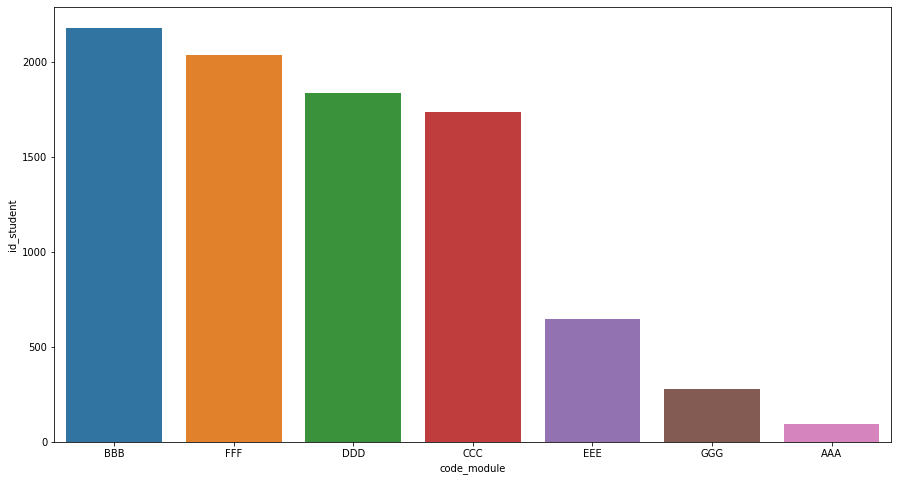

In [439]:
# Визуализируем полученные данные с помощью столбчатой диаграммы

plt.figure(figsize=(15,8))
sns.barplot(data=df_course_outflow, x='code_module', y='id_student')

#### Результат:

В результате анализа датасетов был проведен подсчет кол-ва регистраций на каждый предмет (при этом учитывались даже те заявки, которые в последствии отменялись). После чего было подсчитано количество заявок по отмене регистрации на каждый предмет (поле *date_unregistration* не являлось пустым) c условием, что студент не имел повторные записи на курс. Таблицы были отсортированы по убыванию кол-ва заявок.

**Таблица 1. Топ 3 наиболее полулярных предметов по количеству регистраций**

| Номер | Идентификатор предмета | Количество заявок на регистрацию |
| ------------- | ------------- |  ------------- |
| 1 | BBB | 7692 |
| 2 | FFF | 7397 |
| 3 | DDD | 5848 |

**Таблица 2. Топ 3 предметов с наибольшим оттоком студентов**

| Номер | Идентификатор предмета | Количество заявок по отмене регистрации |
| ------------- | ------------- |  ------------- |
| 1 | BBB | 2180 |
| 2 | FFF | 2038 |
| 3 | DDD | 1837 |

### Задача 5. Выявление семестра с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов

**Исходная формулировка вопроса:** Используя pandas, в период с начала 2013 по конец 2014 выявить семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.

Для ответа на данный вопрос снова воспользуемся датасетами *courses.csv* и *studentRegistration.csv*.

In [440]:
# Создадим отдельный датафрейм df_assessments для вопроса 5, чтобы не изменять исходный

df_assessments_q5 = df_assessments.copy()

In [441]:
# Создадим отдельный датафрейм df_student_assessment для вопроса 5, чтобы не изменять исходный
# Также удалим записи с отсутствующими значениями оценки, означающие, что студент не отправил задание на оценку

print(df_student_assessment.count())
df_student_assessment_q5 = df_student_assessment.dropna()
print(df_student_assessment_q5.count())

id_assessment     173912
id_student        173912
date_submitted    173912
is_banked         173912
score             173739
dtype: int64
id_assessment     173739
id_student        173739
date_submitted    173739
is_banked         173739
score             173739
dtype: int64


In [442]:
# Отфильтруем только те записи из датасета assessments.csv, которые относятся к типу Exam
# Объединим результирующие таблицы с данными по тестам и результатами оценочных работ студентов

df_semester_analysis = df_assessments_q5.query('assessment_type == "Exam"') \
    .merge(df_student_assessment_q5, how='inner', on='id_assessment')
df_semester_analysis

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0
1,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
2,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
3,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
4,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
...,...,...,...,...,...,...,...,...,...,...
4954,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
4955,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
4956,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0
4957,DDD,2014J,25368,Exam,NaN,100.0,653051,242,0,27.0


In [443]:
# Подсчитаем кол-во только успешных попыток (score которых равен или более 40) на каждый семестр

df_semester_analysis_high_score = df_semester_analysis.query('score >= 40') \
    .groupby('code_presentation', as_index=False) \
    .agg({'score': 'count'})
df_semester_analysis_high_score

,code_presentation,score
0,2013B,504
1,2013J,878
2,2014B,1149
3,2014J,1861


In [444]:
# Подсчитаем кол-во всех попыток на каждый семестр

df_semester_analysis_all_scores = df_semester_analysis \
    .groupby('code_presentation', as_index=False) \
    .agg({'score': 'count', 'date_submitted': 'mean'})
df_semester_analysis_all_scores

,code_presentation,score,date_submitted
0,2013B,602,230.179402
1,2013J,968,239.505165
2,2014B,1271,232.988985
3,2014J,2118,243.674221


In [445]:
# Объединим полученные таблицы

df_semester_full = df_semester_analysis_all_scores \
    .merge(df_semester_analysis_high_score, how='inner', on='code_presentation')
df_semester_full

,code_presentation,score_x,date_submitted,score_y
0,2013B,602,230.179402,504
1,2013J,968,239.505165,878
2,2014B,1271,232.988985,1149
3,2014J,2118,243.674221,1861


In [446]:
# Создадим новую колонку для хранения информации о метрике завершенности для каждого семестра и подсчитаем ее

df_semester_full['completeness'] = df_semester_full.score_y / df_semester_full.score_x

In [447]:
# Отсортируем получившуюся таблицу по возрастанию завершаемости курсов 

df_semester_full \
    .drop(columns=['score_x', 'score_y']) \
    .sort_values(by='completeness', ascending=True) \
    .reset_index(drop=True)

,code_presentation,date_submitted,completeness
0,2013B,230.179402,0.837209
1,2014J,243.674221,0.878659
2,2014B,232.988985,0.904013
3,2013J,239.505165,0.907025


In [448]:
# Отсортируем получившуюся таблицу по убыванию среднего времени сдачи курса с начала семестра

df_semester_full \
    .drop(columns=['score_x', 'score_y']) \
    .sort_values(by='date_submitted', ascending=False) \
    .reset_index(drop=True)

,code_presentation,date_submitted,completeness
0,2014J,243.674221,0.878659
1,2013J,239.505165,0.907025
2,2014B,232.988985,0.904013
3,2013B,230.179402,0.837209


#### Результат:

В результате анализа датасетов был проведен подсчет завершаемости для каждого семестра. После чего было среднее значение по сроку сдачи курса (поле *date_submitted*). Результирующая таблица была отсортирована по возрастанию завершаемости курсов и по убыванию среднего времени сдачи курса с начала семестра.

*Семестром с самой низкой завершаемостью курсов является:* **2013B**

*Семестром с самыми долгими средними сроками сдачи курсов является:* **2014J**

### Задача 6. Качественный анализ аудитории на основе RFM-сегментации

**Исходная формулировка вопроса:** Используя python, построить адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно описать, как создавались кластеры. Для каждого RFM-сегмента построить границы метрик recency, frequency и monetary для интерпретации этих кластеров.

**Подготовим датасет для расчета RFM метрик для каждого студента**

In [449]:
# Создадим отдельный датафрейм df_assessments для вопроса 6, чтобы не изменять исходный

df_assessments_q6 = df_assessments.copy()

In [450]:
# Создадим отдельный датафрейм df_student_assessment для вопроса 6, чтобы не изменять исходный
# Также удалим записи с отсутствующими значениями оценки, означающие, что студент не отправил задание на оценку

print(df_student_assessment.count())
df_student_assessment_q6 = df_student_assessment.copy()
df_student_assessment_q6 = df_student_assessment_q6.dropna()
print(df_student_assessment_q6.count())

id_assessment     173912
id_student        173912
date_submitted    173912
is_banked         173912
score             173739
dtype: int64
id_assessment     173739
id_student        173739
date_submitted    173739
is_banked         173739
score             173739
dtype: int64


In [451]:
# Отфильтруем только те записи из датасета assessments.csv, которые относятся к типу Exam
# Объединим результирующие таблицы с данными по тестам и результатами оценочных работ студентов

df_student_analysis = df_assessments_q6.query('assessment_type == "Exam"') \
    .merge(df_student_assessment_q6, how='inner', on='id_assessment')
df_student_analysis

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0
1,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
2,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
3,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
4,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
...,...,...,...,...,...,...,...,...,...,...
4954,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
4955,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
4956,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0
4957,DDD,2014J,25368,Exam,NaN,100.0,653051,242,0,27.0


In [452]:
# Подсчитаем кол-во только успешных попыток (score которых равен или более 40) для каждого студента

df_student_analysis_high_score = df_student_analysis.query('score >= 40') \
    .groupby('id_student', as_index=False) \
    .agg({'score': 'count'})
df_student_analysis_high_score

,id_student,score
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4092,2694886,1
4093,2694933,1
4094,2695608,1
4095,2697181,1


In [453]:
# Подсчитаем кол-во всех попыток на каждого студента и средний срок сдачи работы

df_student_analysis_all_scores = df_student_analysis \
    .groupby('id_student', as_index=False) \
    .agg({'score': 'count', 'date_submitted': 'mean'})
df_student_analysis_all_scores

,id_student,score,date_submitted
0,23698,1,243.0
1,24213,1,236.0
2,27116,1,243.0
3,28046,1,237.0
4,28787,1,243.0
...,...,...,...
4628,2694886,1,236.0
4629,2694933,1,230.0
4630,2695608,1,237.0
4631,2697181,1,230.0


In [454]:
# Объединим полученные таблицы

df_student_full = df_student_analysis_all_scores \
    .merge(df_student_analysis_high_score, how='left', on='id_student')
df_student_full

,id_student,score_x,date_submitted,score_y
0,23698,1,243.0,1.0
1,24213,1,236.0,1.0
2,27116,1,243.0,1.0
3,28046,1,237.0,1.0
4,28787,1,243.0,1.0
...,...,...,...,...
4628,2694886,1,236.0,1.0
4629,2694933,1,230.0,1.0
4630,2695608,1,237.0,1.0
4631,2697181,1,230.0,1.0


In [455]:
# Заполним записи с отсутсвием успешно сданных экзаменов нулями

df_student_full = df_student_full.fillna(0)
df_student_full

,id_student,score_x,date_submitted,score_y
0,23698,1,243.0,1.0
1,24213,1,236.0,1.0
2,27116,1,243.0,1.0
3,28046,1,237.0,1.0
4,28787,1,243.0,1.0
...,...,...,...,...
4628,2694886,1,236.0,1.0
4629,2694933,1,230.0,1.0
4630,2695608,1,237.0,1.0
4631,2697181,1,230.0,1.0


In [456]:
# Создадим новую колонку для хранения информации о метрике завершенности для каждого студента и подсчитаем ее

df_student_full['completeness'] = df_student_full.score_y / df_student_full.score_x

In [457]:
# Проверим корректность создания колонки

df_student_full.head()

,id_student,score_x,date_submitted,score_y,completeness
0,23698,1,243.0,1.0,1.0
1,24213,1,236.0,1.0,1.0
2,27116,1,243.0,1.0,1.0
3,28046,1,237.0,1.0,1.0
4,28787,1,243.0,1.0,1.0


In [458]:
# Удалим ненужные нам колонки

df_student_full = df_student_full.drop(columns=['score_x', 'score_y'])

In [459]:
# Проверим корректность удаления колонок

df_student_full.head()

,id_student,date_submitted,completeness
0,23698,243.0,1.0
1,24213,236.0,1.0
2,27116,243.0,1.0
3,28046,237.0,1.0
4,28787,243.0,1.0


In [460]:
df_student_full.shape[0]

4633

In [461]:
# Подсчитаем средний балл на экзаменах для каждого студента

df_student_analysis_mean_score = df_student_analysis \
    .groupby('id_student', as_index=False) \
    .agg({'score': 'mean'})
df_student_analysis_mean_score

,id_student,score
0,23698,80.0
1,24213,58.0
2,27116,96.0
3,28046,40.0
4,28787,44.0
...,...,...
4628,2694886,69.0
4629,2694933,73.0
4630,2695608,73.0
4631,2697181,80.0


In [462]:
# Объединим с итоговой таблицей

df_rfm_students = df_student_full \
    .merge(df_student_analysis_mean_score, how='left', on='id_student')

df_rfm_students

,id_student,date_submitted,completeness,score
0,23698,243.0,1.0,80.0
1,24213,236.0,1.0,58.0
2,27116,243.0,1.0,96.0
3,28046,237.0,1.0,40.0
4,28787,243.0,1.0,44.0
...,...,...,...,...
4628,2694886,236.0,1.0,69.0
4629,2694933,230.0,1.0,73.0
4630,2695608,237.0,1.0,73.0
4631,2697181,230.0,1.0,80.0


In [463]:
# Завершим подготовку таблицы переименованием колонок согласно установленным метрикам RFM
# R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен

df_rfm_students = df_rfm_students.rename(columns={'date_submitted': 'R', 'completeness': 'F', 'score': 'M'})

In [464]:
# Проверим корректность внесенных изменений

df_rfm_students.head()

,id_student,R,F,M
0,23698,243.0,1.0,80.0
1,24213,236.0,1.0,58.0
2,27116,243.0,1.0,96.0
3,28046,237.0,1.0,40.0
4,28787,243.0,1.0,44.0


In [465]:
df_rfm_students.shape[0]

4633

In [466]:
df_rfm_students.id_student.nunique()

4633

**Проведем RFM-анализ данных**

In [467]:
# Удалим индекс датасета для корректности дальнейшего подсчета квантилей для метрик R и M
# Для завершаемости курса будем делить на два сегмента (завершаемость 1 и 0)

df_rfm_students.set_index('id_student', inplace=True)

In [468]:
df_rfm_students.head()

,R,F,M
id_student,,,
23698,243.0,1.0,80.0
24213,236.0,1.0,58.0
27116,243.0,1.0,96.0
28046,237.0,1.0,40.0
28787,243.0,1.0,44.0


In [469]:
# Подсчитаем квантили для метрик R и M

quantiles = df_rfm_students[['R', 'M']].quantile(q=[0.25, 0.5, 0.75])

In [470]:
quantiles.head()

,R,M
0.25,234.0,50.0
0.50,241.0,66.0
0.75,243.0,82.0


In [518]:
# Создадим функции для распределения записей по кластерам согласно их квантилям и завершаемости

# Чем выше скорость сдачи работ, тем выше сегмент

def RClass(value, parameter_name, quantiles_table):
    if value <= quantiles_table[parameter_name][0.25]:
        return 4
    elif value <= quantiles_table[parameter_name][0.50]:
        return 3
    elif value <= quantiles_table[parameter_name][0.75]:
        return 2
    else:
        return 1
    
# Чем выше балл за экзамен, тем выше сегмент

def MClass(value, parameter_name, quantiles_table):
    if value <= quantiles_table[parameter_name][0.25]:
        return 1
    elif value <= quantiles_table[parameter_name][0.50]:
        return 2
    elif value <= quantiles_table[parameter_name][0.75]:
        return 3
    else:
        return 4
    
# Завершаемость 1 - лучший сегмент, 0 - худший сегмент
    
def FClass(value):
    if value == 1:
        return 4
    else:
        return 1

In [519]:
# Создадим копию датасета для дальнейшей сегментации

rfmSegmentation = df_rfm_students.copy()

In [520]:
# Применим ранее созданные функции для сегментации и создадим колонку RFM классов

rfmSegmentation['R_Quartile'] = rfmSegmentation['R'].apply(RClass, args=('R', quantiles))

rfmSegmentation['F_Segment'] = rfmSegmentation['F'].apply(FClass)

rfmSegmentation['M_Quartile'] = rfmSegmentation['M'].apply(MClass, args=('M', quantiles))

rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Segment.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [521]:
# Проверим корректность осуществленных действий

rfmSegmentation.head()

,R,F,M,R_Quartile,F_Segment,M_Quartile,RFMClass
id_student,,,,,,,
23698,243.0,1.0,80.0,2,4,3,243
24213,236.0,1.0,58.0,3,4,2,342
27116,243.0,1.0,96.0,2,4,4,244
28046,237.0,1.0,40.0,3,4,1,341
28787,243.0,1.0,44.0,2,4,1,241


**Визуализация RFM-анализа**

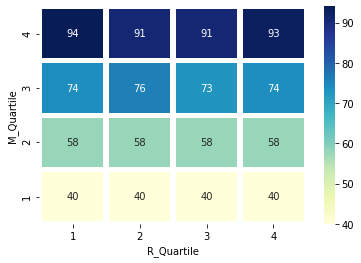

In [524]:
# Визуализируем полученную таблицу с RFM-сегментацией

viz = rfmSegmentation.pivot_table(index='M_Quartile',
                                 columns='R_Quartile',
                                 values='M',
                                 aggfunc=np.median).applymap(int)

ax = sns.heatmap(viz, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=4.15, annot_kws={'size': 10})
ax.invert_yaxis()